In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [30]:
%matplotlib inline

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

In [5]:
data = pd.read_csv("Amazon Sale Report.csv").drop('Unnamed: 22', axis=1)
data.head()

C:\Users\Navazdeen S\AppData\Local\Temp\ipykernel_32012\1412339347.py:1: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("Amazon Sale Report.csv").drop('Unnamed: 22', axis=1)


,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN


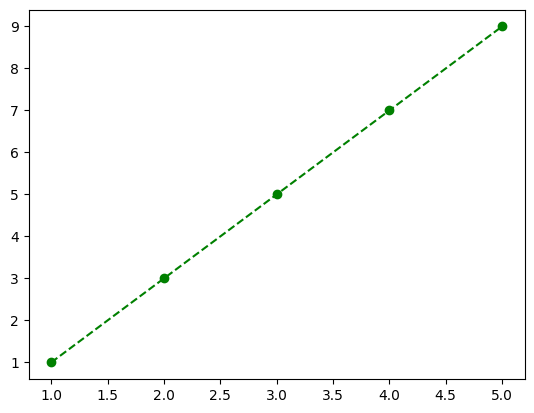

In [18]:
plt.plot([1, 2, 3, 4, 5], [1, 3, 5, 7, 9], "go--")

In [25]:
plt_data = data.groupby(by=['Category']).agg({
    "Amount":'sum',
    "Qty":'sum'
}).sort_values(by=['Amount', 'Qty'], ascending=False).reset_index()

In [26]:
plt_data

,Category,Amount,Qty
0,Set,39204124.03,45289
1,kurta,21299546.70,45045
2,Western Dress,11216072.69,13943
3,Top,5347792.30,9903
4,Ethnic Dress,791217.66,1053
5,Blouse,458408.18,863
6,Bottom,150667.98,398
7,Saree,123933.76,152
8,Dupatta,915.00,3


<BarContainer object of 9 artists>

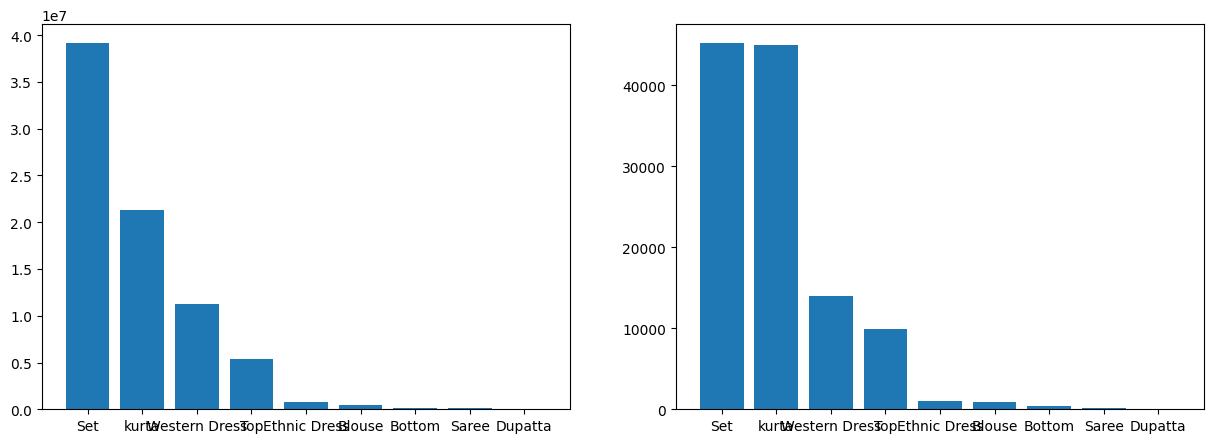

In [39]:
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.bar(plt_data['Category'], plt_data['Amount'])
plt.subplot(122)
plt.bar(plt_data['Category'], plt_data['Qty'])

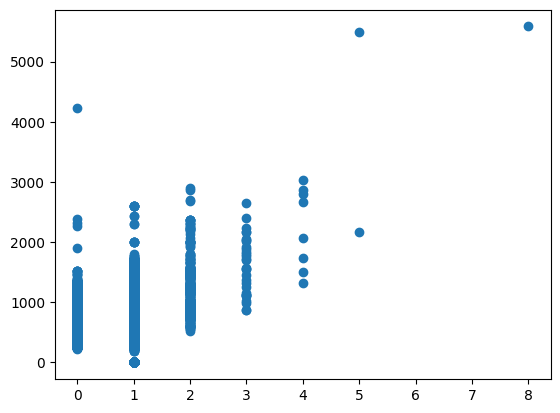

In [40]:
plt.scatter(data['Qty'], data['Amount'])

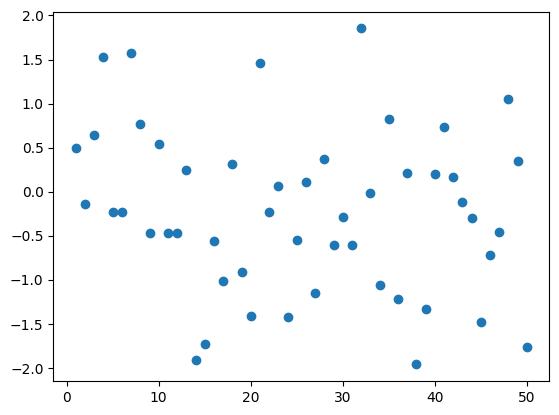

In [49]:
np.random.seed(42)
plt.scatter(np.linspace(1, 50, 50), np.random.randn(50))

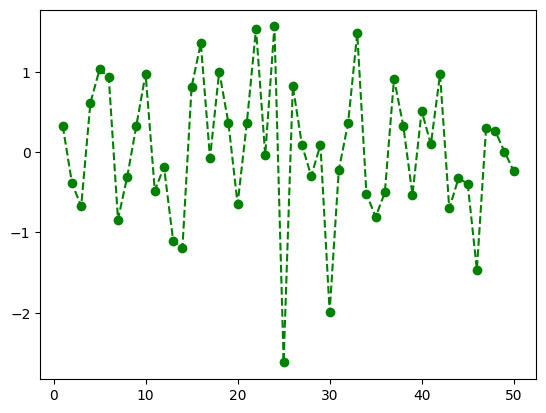

In [50]:
plt.plot(np.linspace(1, 50, 50), np.random.randn(50), "go--")

#### Next week assignment
**[$ x =  -\frac{\pi}{4} to \frac{\pi}{4}, y = \sin x $]**

([<matplotlib.patches.Wedge at 0x20e18a85700>,
 [Text(0.004238880970459329, 1.1499921877509074, 'Set'),
  Text(-0.7641190626268949, -0.8594312410717893, 'kurta'),
  Text(0.6234695377091204, -0.9663258951041186, 'Western Dress'),
  Text(1.0858081805933193, -0.3788411209948391, 'Top'),
  Text(1.1453144340983972, -0.10370557866319674, 'Ethnic Dress'),
  Text(1.1490639556133255, -0.04638993328576436, 'Blouse'),
  Text(1.1498527413309243, -0.018403077290461662, 'Bottom'),
  Text(1.1499854712315853, -0.005780653619471327, 'Saree'),
  Text(1.1499999992512842, -4.14975531027451e-05, 'Dupatta')])

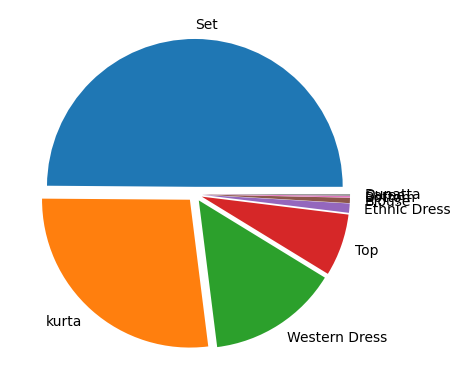

In [67]:
plt.pie(plt_data['Amount'], labels=plt_data['Category'], explode=np.ones(plt_data.shape[0])/20)

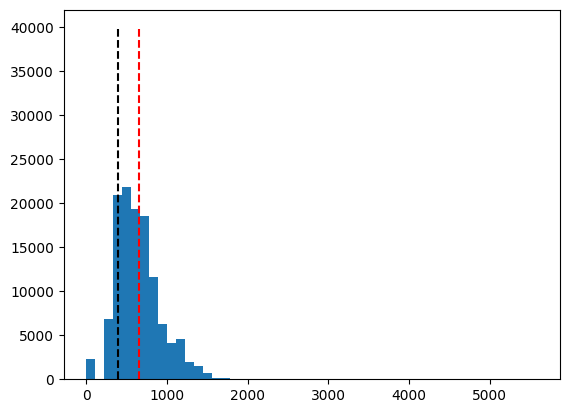

In [90]:
plt.hist(data['Amount'], bins=50)
plt.vlines([data['Amount'].mean()], 0, 40000, colors='red', linestyles='dashed')
plt.vlines([data['Amount'].mode()], 0, 40000, colors='black', linestyles='dashed')
# plt.hlines(data['Amount'].std(), 0, 2000, colors='orange', linestyles='dashdot')

In [74]:
data['Amount'].mean()

648.5614647631621

In [75]:
data['Amount'].mode()

0    399.0
Name: Amount, dtype: float64

In [76]:
data['Amount'].std()

281.2116872291525

In [77]:
data['Amount'].var()

79080.0130342667

In [96]:
x = data.corr()
x

C:\Users\Navazdeen S\AppData\Local\Temp\ipykernel_32012\4038320258.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  x = data.corr()


,index,Qty,Amount,ship-postal-code,B2B
index,1.000000,0.010621,0.047571,0.003719,-0.006149
Qty,0.010621,1.000000,0.066900,-0.010179,0.015783
Amount,0.047571,0.066900,1.000000,-0.038195,0.015706
ship-postal-code,0.003719,-0.010179,-0.038195,1.000000,-0.035648
B2B,-0.006149,0.015783,0.015706,-0.035648,1.000000


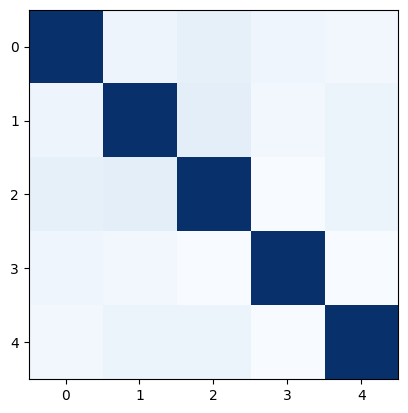

In [102]:
plt.imshow(x, cmap='Blues')

{'whiskers': [<matplotlib.lines.Line2D at 0x20e1e303fa0>,
 'caps': [<matplotlib.lines.Line2D at 0x20e1e329520>,
 'boxes': [<matplotlib.lines.Line2D at 0x20e1e314c10>],
 'medians': [<matplotlib.lines.Line2D at 0x20e1e329a60>],
 'fliers': [<matplotlib.lines.Line2D at 0x20e1e329d00>],
 'means': []}

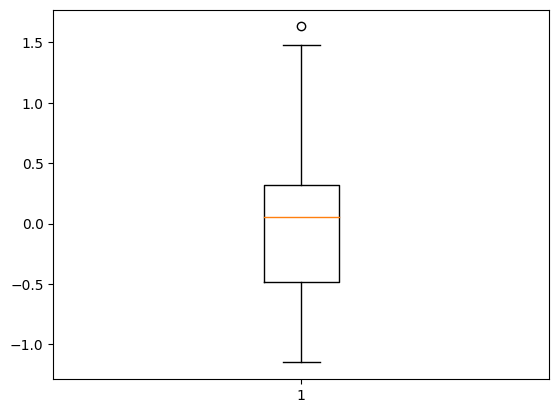

In [111]:
x = 0.5*1.2*np.random.randn(100)

plt.boxplot(x)

*Q1 - Frist Quartile*
<br/>
*IQR - Inter Quartile Range*
<br/>
*Q3 - Third Quartile*

In [112]:
x[x>1.5]

array([1.6321015])

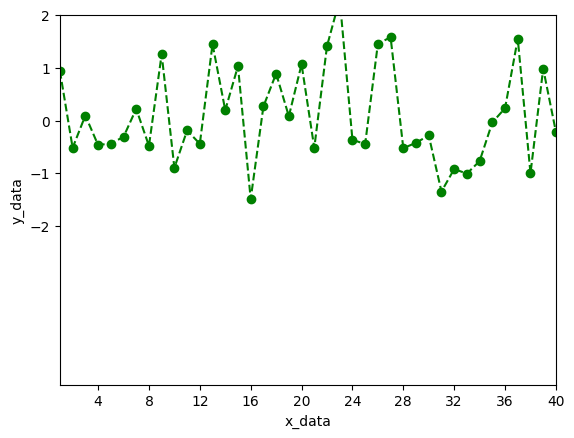

In [125]:
x = np.linspace(1, 50, 50)
y = np.random.randn(50)
plt.plot(x, y, "go--")
plt.xlabel("x_data")
plt.ylabel("y_data")
plt.xticks(np.arange(0, 51, 4))
plt.yticks([-2,-1, 0, 1, 2, 3, 4])
plt.xlim(left=1, right=40)
plt.ylim(top=2, bottom=-5)
plt.show()

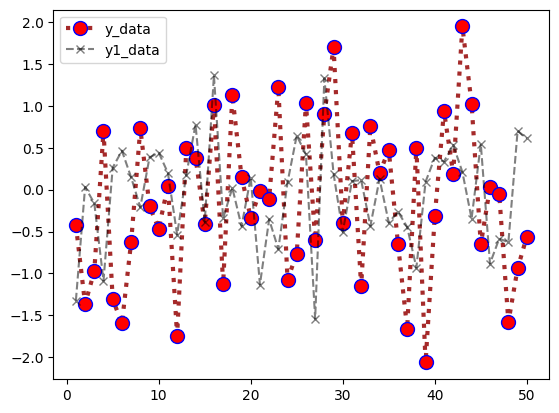

In [166]:
x = np.linspace(1, 50, 50)
y = np.random.randn(50)
y1 = np.random.randn(50)*0.5*1.3
plt.plot(x, y, c='brown', marker='o', markersize=10, linestyle='dotted', linewidth=3,  markeredgecolor='blue', markerfacecolor='red', label='y_data')
plt.plot(x, y1, c='black', marker='x', linestyle='--', alpha=0.5, label="y1_data")
plt.legend()